In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from sklearn.impute import SimpleImputer

In [2]:
os.chdir("/content/Dataset")

In [3]:
files = os.listdir()
files.remove("Economics.pdf")
files.remove("ReadMe.pdf")
files.remove("Weather")

In [4]:
files

['Reference', 'TheAutomators', 'Digilog', 'Automatoes', 'AICU', 'IUACAAS']

In [5]:
Resources = {}
for i in files:
  filepath = os.path.join(i, "Resources.csv")
  Resources[i] = pd.read_csv(filepath)

In [6]:
Resources[files[5]].head()

,%Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,43815,2.7561,0.918667,0.000000,0.007125,0.0000,0.0,NaN,NaN,NaN,NaN,NaN
1,43816,1.1223,0.809250,0.000000,0.008238,0.0000,0.0,NaN,NaN,NaN,NaN,NaN
2,43817,0.9948,0.668250,0.540000,0.012772,0.0000,0.0,NaN,NaN,NaN,NaN,NaN
3,43818,0.0957,0.864000,0.540000,0.027889,0.0000,0.0,NaN,NaN,NaN,NaN,NaN
4,43819,1.7175,0.877500,0.551333,0.025095,0.6565,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
Resources[files[5]] = Resources[files[5]].loc[:, ~Resources[files[5]].columns.str.contains('^Unnamed')]

In [8]:
Resources[files[5]].columns

Index(['%Time ', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr',
       'Drain'],
      dtype='object')

In [9]:
si = SimpleImputer(strategy = "mean")
for i in files:
  column_names = Resources[i].columns
  values = Resources[i].values
  df = si.fit_transform(values)
  Resources[i] = pd.DataFrame(df, columns = column_names)

In [10]:
for i in range(len(files)):
  Resources[files[i]]['%Time '] = pd.to_datetime(Resources[files[i]]['%Time '], unit='D', origin='1899-12-30')

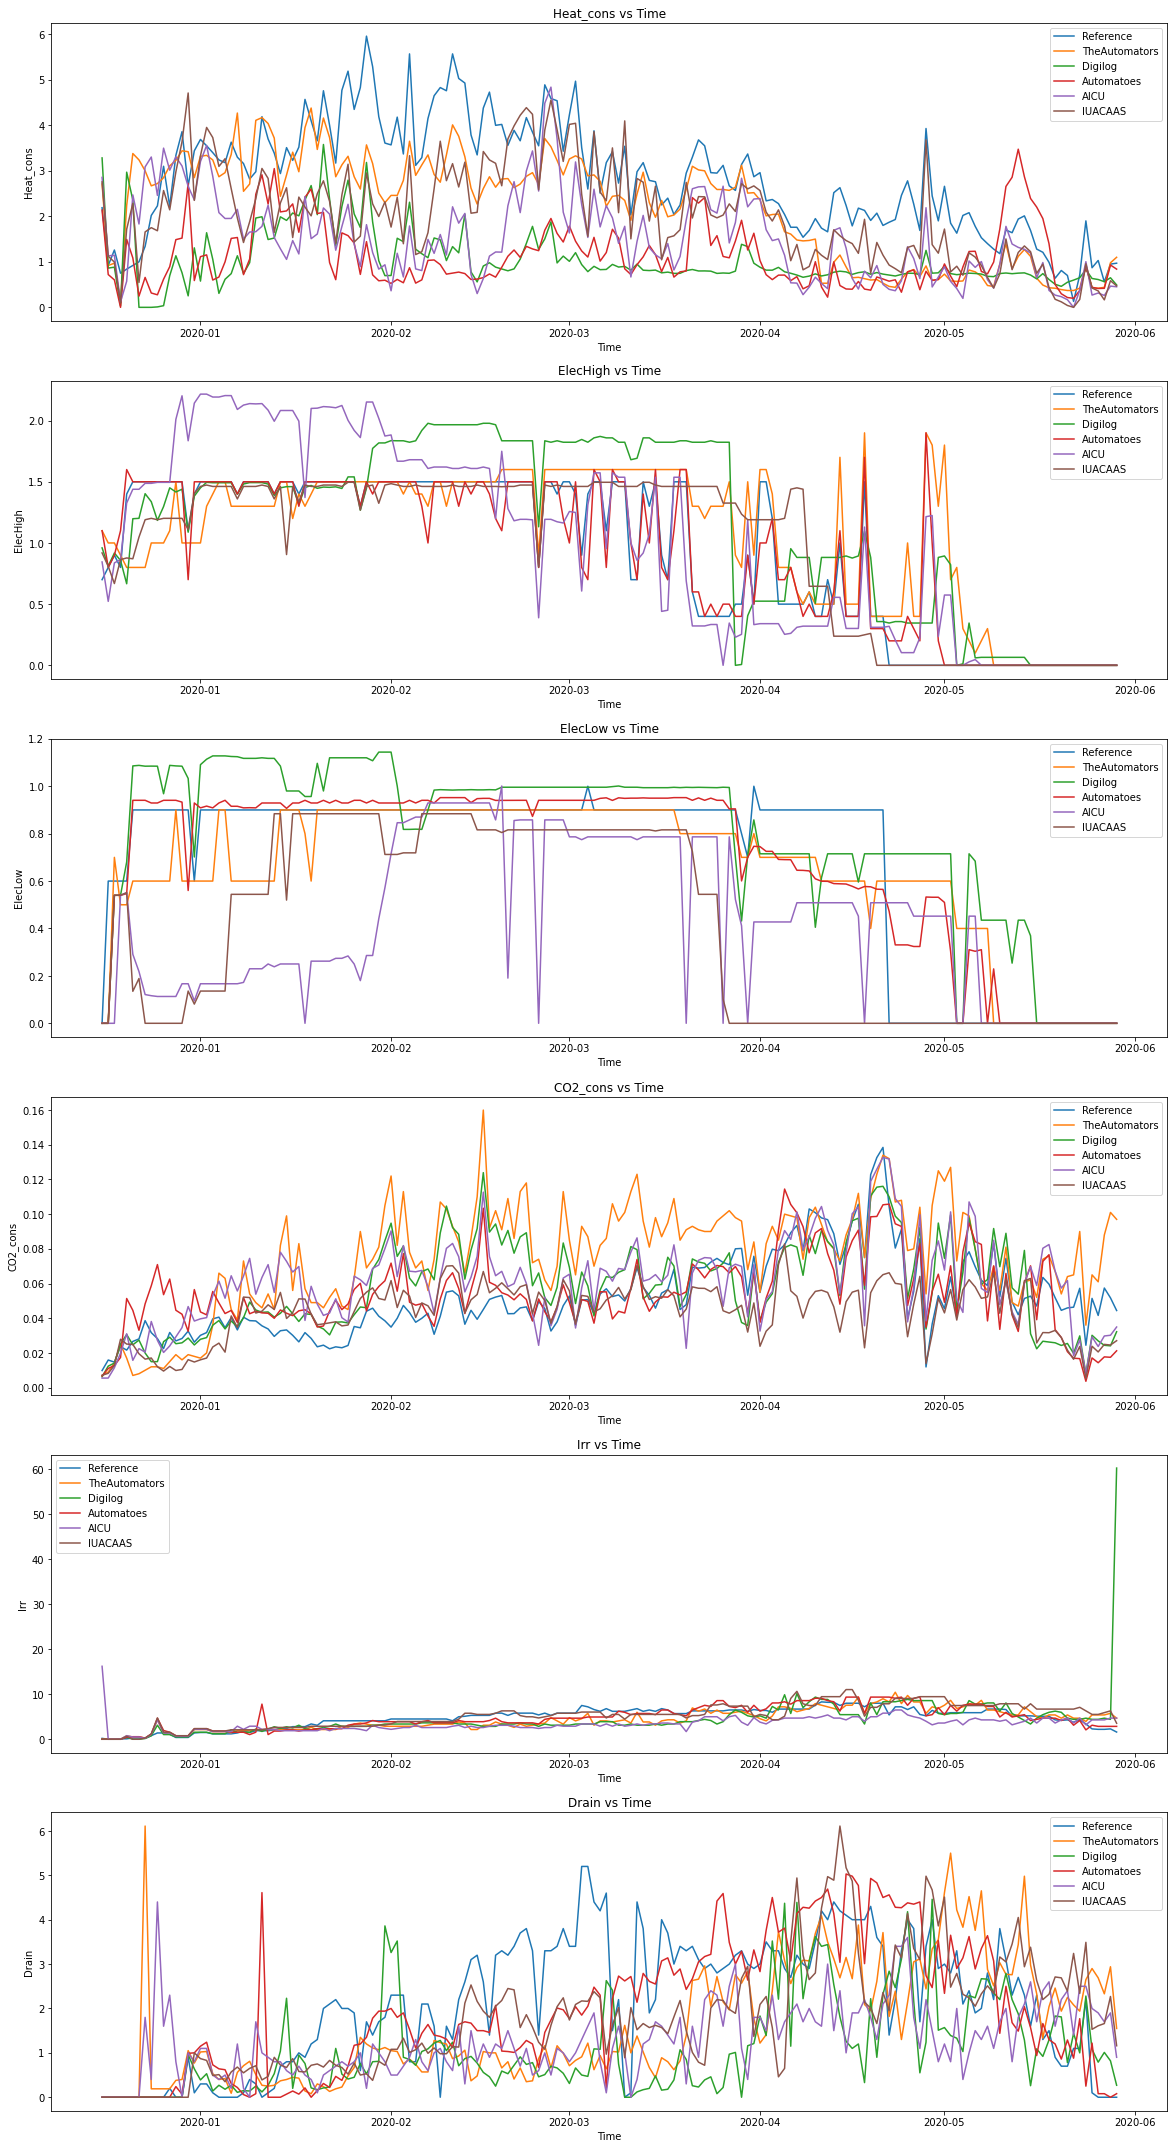

In [11]:
parameters = list(Resources[files[0]].columns)
parameters.remove("%Time ")
plt.figure(figsize = (20, 45))
for paramnum, param in enumerate(parameters):
  plt.subplot(7, 1, paramnum + 1)
  for i in range(len(files)):
    plt.plot(Resources[files[i]]["%Time "], Resources[files[i]][param])
  plt.legend(files, loc = "best")
  plt.title(f"{param} vs Time")
  plt.xlabel("Time")
  plt.ylabel(f"{param}")
plt.show()